# Regresión Logística

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Rutas de drive
train_path = '/content/drive/MyDrive/Colab Notebooks/test_features_final.csv'
test_path  = '/content/drive/MyDrive/Colab Notebooks/train_features_final.csv'
train_path_target = '/content/drive/MyDrive/Colab Notebooks/X_train_top20_features.csv'
train_path_target_balanced = "/content/drive/MyDrive/Colab Notebooks/X_train_top20_features_balanced.csv"
train_final_ces = "/content/drive/MyDrive/Colab Notebooks/x_train_final.csv"
test_final = "/content/drive/MyDrive/Colab Notebooks/x_test_final.csv"

# Cargar dataset desde csv
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)
df_train_target = pd.read_csv(train_final_ces)
df_test_final = pd.read_csv(test_final)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df_train_target.head()

,value__permutation_entropy__dimension_3__tau_1,value__partial_autocorrelation__lag_3,value__ar_coefficient__coeff_2__k_10,value__number_cwt_peaks__n_1,"value__fft_aggregated__aggtype_""kurtosis""",value__absolute_maximum,"value__fft_coefficient__attr_""abs""__coeff_63",value__value_count__value_0,value__ratio_value_number_to_time_series_length,"value__fft_coefficient__attr_""real""__coeff_59",value__percentage_of_reoccurring_datapoints_to_all_datapoints,value__standard_deviation,"value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.2",target
0,1.222197,-0.364176,0.039579,873.0,7.558635,0.244141,2.041470,6.0,0.288991,-1.842494,0.888181,0.042282,-1.304778e-05,0
1,1.148054,0.503543,-2.548149,666.0,13.337208,0.271423,4.105905,6.0,0.279277,-1.307800,0.882731,0.043400,4.631993e-06,1
2,1.649418,-0.654519,0.595491,1041.0,15.387752,0.213471,2.658690,21.0,0.201943,0.842761,0.914193,0.029535,-5.217491e-06,0
3,1.663552,-0.500066,0.336535,1248.0,9.091339,0.156067,1.997953,21.0,0.153589,3.317492,0.950513,0.018126,-4.930034e-08,0
4,1.479723,-0.574134,0.597538,848.0,6.212779,0.342773,5.858558,5.0,0.251376,4.391789,0.912628,0.038896,-1.760129e-05,0


In [13]:
print("Columnas TRAIN:", df_train.columns.tolist())
print("Columnas TEST :", df_test_final.columns.tolist())
print("Columnas TRAIN con target: ", df_train_target.columns.tolist())

Columnas TRAIN: ['Unnamed: 0', 'value__sum_values', 'value__median', 'value__mean', 'value__length', 'value__standard_deviation', 'value__variance', 'value__root_mean_square', 'value__maximum', 'value__absolute_maximum', 'value__minimum']
Columnas TEST : ['value__permutation_entropy__dimension_3__tau_1', 'value__partial_autocorrelation__lag_3', 'value__ar_coefficient__coeff_2__k_10', 'value__number_cwt_peaks__n_1', 'value__fft_aggregated__aggtype_"kurtosis"', 'value__absolute_maximum', 'value__fft_coefficient__attr_"abs"__coeff_63', 'value__value_count__value_0', 'value__ratio_value_number_to_time_series_length', 'value__fft_coefficient__attr_"real"__coeff_59', 'value__percentage_of_reoccurring_datapoints_to_all_datapoints', 'value__standard_deviation', 'value__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.2']
Columnas TRAIN con target:  ['value__permutation_entropy__dimension_3__tau_1', 'value__partial_autocorrelation__lag_3', 'value__ar_coefficient__coeff_2__k_10', 'value

Ahora vamos a implementar la función de Regresión Logística a partir de los datos de entrenamiento.



In [14]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Entrenamiento usando descenso por gradiente
def logistic_regression(X, y, alpha, epochs=1000, track_loss=False):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    losses = []

    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, w) + b)

        # Gradientes
        dw = np.dot(X.T, (y_pred-y))/n_samples
        db = np.sum(y_pred-y)/n_samples

        # Actualización
        w -= alpha * dw
        b -= alpha * db

        # Guardar pérdida si se pide
        if track_loss:
            losses.append(compute_loss(y, y_pred))
    if(track_loss):
      print("Loss inicial: ", losses[0])
      print("Loss final: ", losses[-1])
    return (w, b)

def compute_loss(y, y_pred, eps=1e-15):
    # Clipping para evitar log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

# Predicción usando w y b
def predict(X, w, b, threshold=0.5):
    y_pred_proba = sigmoid(np.dot(X, w) + b)
    return (y_pred_proba >= threshold).astype(int)

In [15]:
# Separar x, y (última columna = target [0 o 1])
from sklearn.preprocessing import StandardScaler

x = df_train_target.drop(columns=['target'])
y = df_train_target.iloc[:, -1]

# Vamos a normalizar el vector x para no tener overflow
scaler = StandardScaler()
X = scaler.fit_transform(x)

# para alpha = 0.1
w, b = logistic_regression(X, y, alpha=0.1, epochs = 4000, track_loss = True)
print(w, b)


Loss inicial:  0.6931471805599452
Loss final:  0.39559688085855493
[-7.52546270e-01  7.33703925e-01  5.64138934e-04 -3.31441619e-01
 -1.56154199e-01  3.80699780e-01  1.42388727e+00 -4.83488898e-01
 -3.25950580e-01 -1.36000513e+00  8.45228126e-01 -1.00304084e+00
 -4.25505085e-01] -1.5894791326490811


# Smote

In [16]:
from imblearn.over_sampling import SMOTE

# Separar características y target
# x sin normalizar
A = x
B = y
# Aplicar SMOTE
smote = SMOTE(random_state=42, sampling_strategy=1.0)  # sampling_strategy=1.0 significa 50%-50%
A_balanced, B_balanced = smote.fit_resample(A, B)

# Crear nuevo DataFrame balanceado
df_balanced = pd.DataFrame(A_balanced, columns=A.columns)
df_balanced['target'] = B_balanced

# Verificar la nueva distribución
print("Distribución después de SMOTE:")
print(f"Clase 0: {sum(B_balanced == 0)} muestras, proporción: {sum(B_balanced == 0)/len(B_balanced)*100:.2f}%")
print(f"Clase 1: {sum(B_balanced == 1)} muestras, proporción: {sum(B_balanced == 1)/len(B_balanced)*100:.2f}%")


Distribución después de SMOTE:
Clase 0: 149 muestras, proporción: 50.00%
Clase 1: 149 muestras, proporción: 50.00%


In [17]:
# Normalizamos x
A_balanced2= scaler.fit_transform(A_balanced)
print(A_balanced2)


[[-0.68504045 -0.85603444  0.79044256 ... -0.08881093 -0.13366674
   0.12757341]
 [-1.07000358  1.45682887 -2.62906675 ... -0.16442528 -0.11165933
   0.55126086]
 [ 1.5331777  -1.62993082  1.52504365 ...  0.27204172 -0.38455411
   0.31522264]
 ...
 [-1.18688117  1.07705515 -0.8153082  ... -0.35209387  0.19339254
  -0.15642888]
 [-1.03453336 -1.00812928  0.6699085  ...  0.30605652 -0.24306312
   0.25192956]
 [-0.73860007  2.49030791 -0.94499353 ... -0.80719613  1.06406371
  -0.70353212]]


In [18]:
# Kaggle competition using smote

from google.colab import files
print(len(df_test_final))

# change here
w3, b3 = logistic_regression(A_balanced2, B_balanced, alpha=0.1, epochs = 4000, track_loss = True)

p = predict(df_test_final, w3, b3, threshold=0.5)
p = np.asarray(p, dtype=int).ravel()   # asegura 1D e int

n = p.shape[0]


submission = pd.DataFrame({
    "ID": np.arange(1, n+1),  # índice 1..n
    "result": p               # segunda columna = array p
})

submission = submission[["ID", "result"]]

first_row = pd.DataFrame([["ID", "result"]], columns=["ID", "result"])
submission_out = pd.concat([first_row, submission.astype(object)], ignore_index=True)
print(submission)


205
Loss inicial:  0.6931471805599453
Loss final:  0.4427860355738619
      ID  result
0      1       1
1      2       0
2      3       1
3      4       1
4      5       1
..   ...     ...
200  201       1
201  202       1
202  203       0
203  204       1
204  205       1

[205 rows x 2 columns]


In [19]:
# download
submission_out.to_csv("competition.csv", index=False, header=False)
files.download("competition.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Experimentación

Vamos a optimizar los hiperparámetros. Para ello vamos a usar los siguientes valores para alpha: 0.001, 0.005, 0.01, 0.05, 0.1 y epochs: 200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000.

In [20]:
def train_over_alphas(X, y, alphas=[], epochs_list=[]):
    results = {}  # {alpha: {'w': w, 'b': b}}
    for a in alphas:
        for e in epochs_list:
          w, b = logistic_regression(X, y, alpha=a, epochs=e,track_loss = True)
          results[a] = {'w': w, 'b': b}
          print(f"Alpha: {a}, Epoch: {e}, W: {results[a]['w']}, B: {results[a]['b']}")
          print()

    return results


In [21]:
alpha_results = train_over_alphas(X, y, alphas=[0.001, 0.005, 0.01, 0.025,0.05,0.1], epochs_list =[200, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])


Loss inicial:  0.6931471805599452
Loss final:  0.6541466073757826
Alpha: 0.001, Epoch: 200, W: [-0.03161711  0.02945123 -0.02849698 -0.0271494   0.02338672  0.02044083
  0.0193721  -0.01814992  0.0146445  -0.01621    -0.00841433  0.00795263
 -0.0091658 ], B: -0.04495321679578124

Loss inicial:  0.6931471805599452
Loss final:  0.6161531761406508
Alpha: 0.001, Epoch: 500, W: [-0.06842201  0.06338913 -0.06090997 -0.05729289  0.04903902  0.04163483
  0.04194301 -0.03744977  0.02692409 -0.03945636 -0.01279186  0.01249989
 -0.01903949], B: -0.10837167587621939

Loss inicial:  0.6931471805599452
Loss final:  0.5780733164297182
Alpha: 0.001, Epoch: 1000, W: [-0.11184711  0.10273038 -0.0974993  -0.08983745  0.07582527  0.06223392
  0.06989197 -0.05738598  0.03290951 -0.07457093 -0.00827299  0.00978481
 -0.03010002], B: -0.20462761883375205

Loss inicial:  0.6931471805599452
Loss final:  0.5534891614662194
Alpha: 0.001, Epoch: 1500, W: [-0.14236935  0.12965624 -0.12146534 -0.1098176   0.09103071

Analizando los resultados, podemos ver que:

para α = 0.10 y epochs = 4000 epochs (loss = 0.395597) tiene el mejor resultado. Se está ajustando mejor el ruido a comparación de epochs más grandes (>4000) y la magnitud de w es sostenida.A partir de ~3000 epochs aprox la mejora es mínima (~7 x 10^5).


# Vamos a implementar diversas funciones para las métricas



In [22]:
w2, b2 = logistic_regression(X, y, alpha=0.1, epochs = 4000, track_loss = True)

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    log_loss, classification_report
)
import matplotlib.pyplot as plt

def report_metrics(X, y, w, b, threshold=0.5, pick_threshold=None, average="binary", print_report=True):

    #Calcula accuracy, precision, recall, F1, log loss y matriz de confusión.
    y = np.asarray(y).astype(int)
    proba = predict(X, w, b)

    # Elegir umbral automáticamente (si procede)
    used_threshold = float(threshold)
    if pick_threshold is not None:
        used_threshold = _choose_threshold(y, proba, strategy=pick_threshold)

    y_pred = (proba >= used_threshold).astype(int)

    # Métricas básicas
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average=average, zero_division=0)
    rec = recall_score(y, y_pred, average=average, zero_division=0)
    f1 = f1_score(y, y_pred, average=average, zero_division=0)
    cm = confusion_matrix(y, y_pred)

    # Log loss (seguro)
    try:
        ll = log_loss(y, proba, eps=1e-15)
    except Exception:
        ll = np.nan

    # Reporte sklearn (opcional)
    cls_rep = classification_report(y, y_pred, zero_division=0)

    results = {
        "threshold": used_threshold,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "log_loss": ll,
        "confusion_matrix": cm,
        "classification_report": cls_rep,
    }

    if print_report:
        print(f"Threshold usado: {used_threshold:.4f}")
        print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
        print(f"LogLoss: {ll:.4f}")
        print("Matriz de confusión:\n", cm)
        print("\nClassification report:\n", cls_rep)

    return results

Loss inicial:  0.6931471805599452
Loss final:  0.39559688085855493


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- Helpers de gráficos ----------
def _plot_confusion_matrix(cm, title="Matriz de Confusión", class_names=("0","1")):
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, [f"Pred {c}" for c in class_names])
    plt.yticks(tick_marks, [f"True {c}" for c in class_names])

    # anotar valores
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.tight_layout()
    plt.show()

def _plot_confusion_matrix_normalized(cm, title="Matriz de Confusión (normalizada por fila)", class_names=("0","1")):
    cm = cm.astype(float)
    row_sums = cm.sum(axis=1, keepdims=True)
    cm_norm = np.divide(cm, row_sums, out=np.zeros_like(cm), where=row_sums!=0)

    plt.figure()
    plt.imshow(cm_norm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, [f"Pred {c}" for c in class_names])
    plt.yticks(tick_marks, [f"True {c}" for c in class_names])

    for i in range(cm_norm.shape[0]):
        for j in range(cm_norm.shape[1]):
            plt.text(j, i, f"{cm_norm[i, j]:.2f}", ha="center", va="center")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.tight_layout()
    plt.show()

def _plot_main_bars(accuracy, precision, recall, f1, title="Métricas Principales"):
    metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
    values  = [accuracy, precision, recall, f1]

    plt.figure()
    plt.bar(metrics, values)
    plt.ylim(0, 1)
    plt.title(title)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.3f}", ha="center")
    plt.ylabel("Score")
    plt.tight_layout()
    plt.show()

def plot_report_from_results(results, class_names=("0","1")):
    """results: dict devuelto por tu report_metrics(...)"""
    cm = results["confusion_matrix"]
    _plot_confusion_matrix(cm, title=f"Matriz de Confusión (threshold={results['threshold']:.2f})",
                           class_names=class_names)
    _plot_confusion_matrix_normalized(cm, class_names=class_names)
    _plot_main_bars(results["accuracy"], results["precision"], results["recall"], results["f1"])

    # Mostrar resumen + classification report (string)
    print("== Resumen ==")
    print(f"Threshold: {results['threshold']:.4f}")
    print(f"Accuracy:  {results['accuracy']:.4f}")
    print(f"Precision: {results['precision']:.4f}")
    print(f"Recall:    {results['recall']:.4f}")
    print(f"F1:        {results['f1']:.4f}")
    print(f"LogLoss:   {results['log_loss']}\n")

    print("== Classification report ==")
    print(results["classification_report"])

def plot_report_from_raw(threshold, accuracy, precision, recall, f1, conf_mat,
                         cls_table=None, class_names=("0","1")):
    """Usa valores sueltos (como tu captura)"""
    _plot_confusion_matrix(conf_mat, title=f"Matriz de Confusión (threshold={threshold:.2f})",
                           class_names=class_names)
    _plot_confusion_matrix_normalized(conf_mat, class_names=class_names)
    _plot_main_bars(accuracy, precision, recall, f1)

    if cls_table is not None:
        display(cls_table.style.set_caption("Classification report"))

Threshold usado: 0.5000
Accuracy: 0.8284 | Precision: 0.7632 | Recall: 0.5273 | F1: 0.6237
LogLoss: nan
Matriz de confusión:
 [[140   9]
 [ 26  29]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       149
           1       0.76      0.53      0.62        55

    accuracy                           0.83       204
   macro avg       0.80      0.73      0.76       204
weighted avg       0.82      0.83      0.82       204



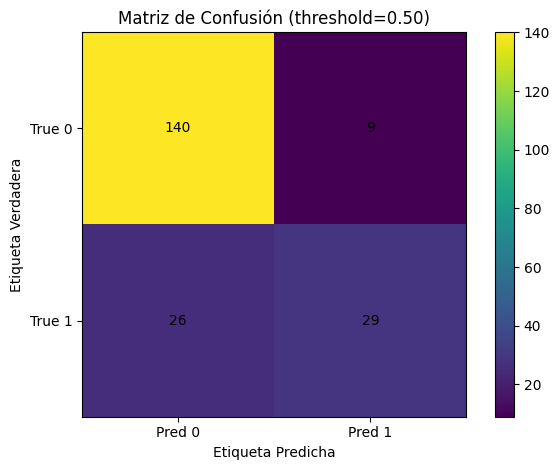

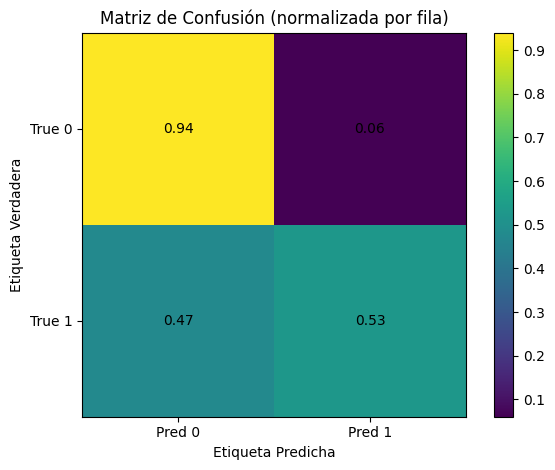

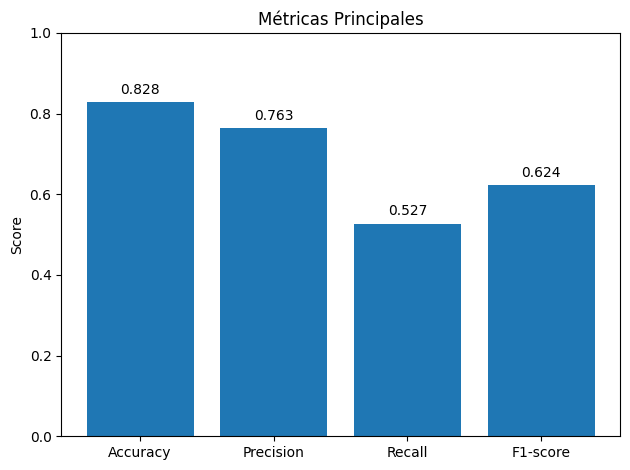

,class,precision,recall,f1-score,support
0,0,0.840000,0.940000,0.890000,149
1,1,0.760000,0.530000,0.620000,55


In [28]:
# sin smote
m=report_metrics(X, y, w2, b2, threshold = 0.5, pick_threshold=None, average = "binary", print_report=True)
threshold = 0.5
accuracy  = 0.8284
precision = 0.7632
recall    = 0.5273
f1        = 0.6237
conf_mat = np.array([[140, 9],
                     [26, 29]], dtype=int)

cls_table = pd.DataFrame({
    "class": ["0", "1"],
    "precision": [0.84, 0.76],
    "recall":    [0.94, 0.53],
    "f1-score":  [0.89, 0.62],
    "support":   [149, 55],
})

plot_report_from_raw(threshold, accuracy, precision, recall, f1, conf_mat, cls_table)




In [ ]:
# con smote
m_smote = report_metrics(A_balanced2, B_balanced,w3,b3,threshold = 0.5, pick_threshold=None, average = "binary", print_report=True)

# Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
def cross_validate_logreg(X, y, k=5, alpha=0.1, epochs=1000, threshold=0.5, random_state=42, verbose=True):
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=int)

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=random_state)

    fold_results = []
    for fold, (tr, te) in enumerate(skf.split(X, y), start=1):
        X_tr, X_te = X[tr], X[te]
        y_tr, y_te = y[tr], y[te]

        # Escalar SOLO con datos de train del fold
        scaler = StandardScaler().fit(X_tr)
        X_tr_std = scaler.transform(X_tr)
        X_te_std = scaler.transform(X_te)

        # Entrenar
        w, b = logistic_regression(X_tr_std, y_tr, alpha=alpha, epochs=epochs)

        # Inferencia
        proba = predict(X_te_std, w, b)
        y_pred = (proba >= threshold).astype(int)

        # Métricas
        acc = accuracy_score(y_te, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_te, y_pred, average="binary", zero_division=0)

        # AUC y LogLoss (clip para evitar log(0))
        eps = 1e-12
        auc = roc_auc_score(y_te, proba)
        ll = log_loss(y_te, np.clip(proba, eps, 1 - eps))

        cm = confusion_matrix(y_te, y_pred)

        res = dict(fold=fold, accuracy=acc, precision=prec, recall=rec, f1=f1, auc=auc, logloss=ll, cm=cm)
        fold_results.append(res)

        if verbose:
            print(f"[Fold {fold}] Acc={acc:.4f} | P={prec:.4f} | R={rec:.4f} | F1={f1:.4f} | AUC={auc:.4f} | LogLoss={ll:.4f}")
            print("Matriz de confusión:\n", cm, "\n")

    # Promedios
    keys = ["accuracy", "precision", "recall", "f1", "auc", "logloss"]
    summary = {f"mean_{k}": float(np.mean([r[k] for r in fold_results])) for k in keys}
    summary.update({f"std_{k}": float(np.std([r[k] for r in fold_results], ddof=1)) for k in keys})
    return fold_results, summary

In [ ]:
folds, summary = cross_validate_logreg(
    X, y,
    k=5,
    alpha=0.1,
    epochs=1500,
    threshold=0.5,
    random_state=42,
    verbose=True
)

print("Resumen (media ± std):")
for k in ["accuracy","precision","recall","f1","auc","logloss"]:
    print(f"{k:>9}: {summary['mean_'+k]:.4f} ± {summary['std_'+k]:.4f}")